# Solving the 1-D Schrodinger Equation
$$ i \hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2\psi}{\partial x^2} + V(x)\psi $$

## Discretization (after dimensional analysis)

$$ i \frac{d\phi}{dt} = H \phi $$

where

$$H_{ij} = -\frac{1}{\Delta^2}\left(\delta_{i+1,j}-2\delta_{i,j}+\delta_{i-1,j}\right) + U_i \delta_{i,j} $$  


Formal solution:  

$$ \phi(t) = e^{-i H t} \phi(0) $$

Strategy:  
1. Solve for eigenvalues and eigenvectors of $H$  

$$ H \phi_n = \epsilon_n \phi_n $$  

2. Expand $\phi(0)$ in the basis of eigenvectors  

$$ \phi(0) = \sum_n c_n \phi_n $$  
where $c_n = \phi_n^{\dagger} \phi(0)$  

3. The state $\phi(t)$ is then given by  

\begin{eqnarray*}
\phi(t) &=& e^{-i H t} \phi(0) \\
&=& \sum_n c_n e^{-i\epsilon_n t}\phi_n
\end{eqnarray*}

## Example: Time evolution of free particle

Initial wavefunction: Gaussian


In [1]:
import numpy as np
from numpy import linalg as lin
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [3]:
delta = 0.05
L = 30. 
N = int(L / delta )
dimension = 2*N + 1 # Number of lattice points.
x = np.linspace(-L,L,2*N+1)
V0 = 100

In [4]:
def kronecker(i,j):
    return 1 if i==j else 0
def V(z):
    return V0 if abs(z)> L/50 else 0
def h(i,j):
    return (-kronecker(i+1,j) + 2*kronecker(i,j) - kronecker(i-1,j))/delta**2 + V(delta*i) * kronecker(i,j)

In [5]:
H = np.array( [[h(i,j) for i in range(-N,N+1)] for j in range(-N,N+1)] ) # The Hamiltonian matrix
H_eigenvalues, H_eigenvectors = lin.eig(H)
idx = H_eigenvalues.argsort() # Sorted indices (increasing order of eigenvalues)
H_eigenvalues = H_eigenvalues[idx] # Sorted eigenvalues
H_eigenvectors = H_eigenvectors[:,idx] # Sorted eigenvectors

In [6]:
v= np.array([V(delta*i)for i in range(-N,N+1)])

In [7]:
a = 1.0 ## Initial spread in units of l0
b = -L/5 ## Initial peak of the Gaussian
p_i = 8.0 ## Mean momentum in units of hbar/l0

In [8]:
def psi0(y,p0):
    return (1/pow(np.pi*(a**2),0.25))*np.exp(-((y-b)**2)/(2.0*a**2) - 1j*p0*y)



In [9]:
Psi_i = np.sqrt(delta)*np.array( [psi0(delta*i,p_i ) for i in range(-N,N+1)], 'complex' )


In [10]:
potential = 0.01*np.array([V(delta*i) for i in range(-N,N+1)]) # Values of U(y) stored at lattice points

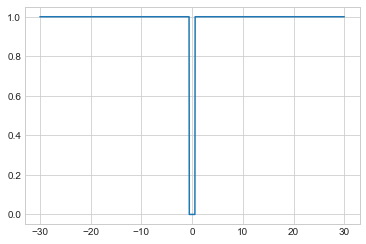

In [11]:
plt.plot(x,potential)

In [14]:
def Psi(t,psi):
    sum = np.zeros(dimension, 'complex')
    for n in range(dimension):
        c = np.vdot(psi, H_eigenvectors[:,n]) # nth expansion coefficient 
        E = H_eigenvalues[n]
        sum += c * np.exp(-E*t*1.0j) * H_eigenvectors[:,n]
    return sum

def Prob(t,psi):
    return np.abs(Psi(t, Psi_i))**2

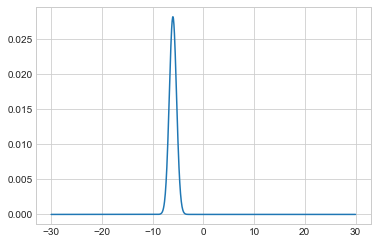

In [15]:
plt.plot(x, (Prob(0, Psi_i)))


In [16]:
    

def RT(t,psi):
    LT= Prob(t,psi)
    R=0
    T=0
    for i in range(dimension):
        if x[i]<=L/50:
            R+=LT[i]
        elif x[i]> L/50:
            T+=LT[i]
    return [R,T]
            

In [17]:
p0s=np.linspace(8,10,21)
Ts=[]
Rs=[]
for m in range(len(p0s)):
    Psi_i = np.sqrt(delta)*np.array( [psi0(delta*i,p0s[m]) for i in range(-N,N+1)], 'complex' )
    Ts.append(RT(1.2,Psi_i)[1])
    Rs.append(RT(1.2,Psi_i)[0])
    

Text(0.5, 0, 'momentum')

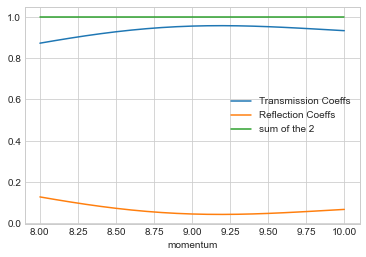

In [18]:
plt.plot(p0s, Ts, label = "Transmission Coeffs")
plt.plot(p0s, Rs, label = "Reflection Coeffs")
plt.plot(p0s, np.array(Ts) + np.array(Rs), label = "sum of the 2")
plt.legend()
plt.xlabel("momentum")

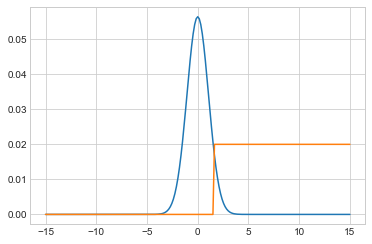

In [123]:
plt.plot(x, Prob(0))
plt.plot(x, potential)

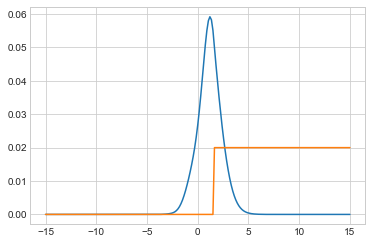

In [124]:
plt.plot(x, Prob(0.3))
plt.plot(x, potential)

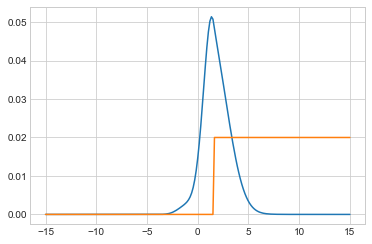

In [125]:
plt.plot(x, Prob(0.5))
plt.plot(x, potential)

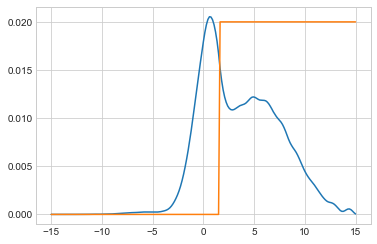

In [126]:
plt.plot(x, Prob(1.5))
plt.plot(x, potential)

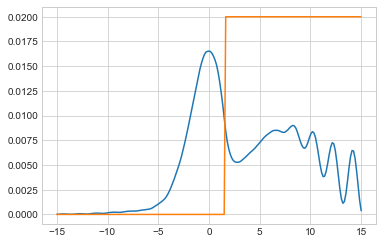

In [128]:
plt.plot(x, Prob(2))
plt.plot(x, potential)